# Tugas Besar Pemrosesan Paralel (Class B)
## Analysis Harga MSRP Mobil Menggunakan Pyspark
1. I Nengah Dwi Putra Witarsana (F1D022049)
2. Rizki Rahman Maulana	(F1D022093)
3. Rizky Insania Ramadhani	(F1D022094)
4. Wahyu Septian Wibowo	(F1D022100)
5. Fernandao Kwangtama Tekayadi	(F1D022120)

Link Kaggle: https://www.kaggle.com/datasets/CooperUnion/cardataset

In [1]:
import psutil
print(psutil.cpu_percent())

26.0


In [2]:
import time

In [3]:
!pip install pyspark
print(psutil.cpu_percent())

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.0/317.0 MB 2.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.1-py2.py3-none-any.whl size=317488491 sha256=a164e7bee1287da484097cd584589b000b6caa25dd588e95509a1ac01d959889
  Stored in directory: /root/.cache/pip/wheels/80/1d/60/2c256ed38dddce2fdd93be545214a63e02fbd8d74fb0b7f3a6
Successfully built pyspark
63.8


In [4]:
!rm -rf output/
print(psutil.cpu_percent())

17.4


In [5]:
from pyspark.sql import SparkSession
import matplotlib.pyplot as plt
print(psutil.cpu_percent())

60.0


In [6]:
spark = SparkSession.builder\
        .master("local")\
        .appName("Colab")\
        .config('spark.ui.port', '4050')\
        .getOrCreate()
print(psutil.cpu_percent())

93.9


In [7]:
mulai_ukur = time.time()
print(psutil.cpu_percent())

100.0


In [28]:
df = spark.read.csv('/content/data.csv',inferSchema=True,header='true')
print(psutil.cpu_percent())

99.8


In [9]:
df.show()
print(psutil.cpu_percent())

+----+----------+----+--------------------+---------+----------------+-----------------+-----------------+---------------+--------------------+------------+-------------+-----------+--------+----------+-----+
|Make|     Model|Year|    Engine Fuel Type|Engine HP|Engine Cylinders|Transmission Type|    Driven_Wheels|Number of Doors|     Market Category|Vehicle Size|Vehicle Style|highway MPG|city mpg|Popularity| MSRP|
+----+----------+----+--------------------+---------+----------------+-----------------+-----------------+---------------+--------------------+------------+-------------+-----------+--------+----------+-----+
| BMW|1 Series M|2011|premium unleaded ...|      335|               6|           MANUAL| rear wheel drive|              2|Factory Tuner,Lux...|     Compact|        Coupe|         26|      19|      3916|46135|
| BMW|  1 Series|2011|premium unleaded ...|      300|               6|           MANUAL| rear wheel drive|              2|  Luxury,Performance|     Compact|  Conver

In [10]:
show = df.toPandas()
display(show)
print(psutil.cpu_percent())

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920


100.0


In [11]:
summary = df.summary().toPandas()
display(summary)
print(psutil.cpu_percent())

,summary,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,count,11914,11914,11914,11911,11845,11884,11914,11914,11908,11914,11914,11914,11914,11914,11914,11914
1,mean,None,745.5822222222222,2010.384337753903,None,249.38607007176023,5.628828677213059,None,None,3.4360933825999327,None,None,None,26.637485311398354,19.73325499412456,1554.9111969111968,40594.737032063116
2,stddev,None,1490.8280590623795,7.5797398875957995,None,109.19187025917194,1.78055934824622,None,None,0.8813153865835529,None,None,None,8.863000766979422,8.987798160299237,1441.8553466274648,60109.10360365422
3,min,Acura,1 Series,1990,diesel,55,0,AUTOMATED_MANUAL,all wheel drive,2,Crossover,Compact,2dr Hatchback,12,7,2,2000
4,25%,None,86.0,2007,None,170,4,None,None,2,None,None,None,22,16,549,21000
5,50%,None,500.0,2015,None,227,6,None,None,4,None,None,None,26,18,1385,29995
6,75%,None,900.0,2016,None,300,6,None,None,4,None,None,None,30,22,2009,42220
7,max,Volvo,xD,2017,regular unleaded,1001,16,UNKNOWN,rear wheel drive,4,"Performance,Hybrid",Midsize,Wagon,354,137,5657,2065902


99.2


In [12]:
desc = df.describe().toPandas()
display(desc)
print(psutil.cpu_percent())

,summary,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,count,11914,11914,11914,11911,11845,11884,11914,11914,11908,11914,11914,11914,11914,11914,11914,11914
1,mean,None,745.5822222222222,2010.384337753903,None,249.38607007176023,5.628828677213059,None,None,3.4360933825999327,None,None,None,26.637485311398354,19.73325499412456,1554.9111969111968,40594.737032063116
2,stddev,None,1490.8280590623795,7.5797398875957995,None,109.19187025917194,1.78055934824622,None,None,0.8813153865835529,None,None,None,8.863000766979422,8.987798160299237,1441.8553466274648,60109.10360365422
3,min,Acura,1 Series,1990,diesel,55,0,AUTOMATED_MANUAL,all wheel drive,2,Crossover,Compact,2dr Hatchback,12,7,2,2000
4,max,Volvo,xD,2017,regular unleaded,1001,16,UNKNOWN,rear wheel drive,4,"Performance,Hybrid",Midsize,Wagon,354,137,5657,2065902


99.7


In [13]:
df.createOrReplaceTempView("car")
print(psutil.cpu_percent())

100.0


In [14]:
average_msrp = df.agg({"MSRP": "avg"}).collect()[0][0]
print(psutil.cpu_percent())

100.0


In [15]:
res = spark.sql(f"SELECT * FROM car WHERE MSRP > {average_msrp}")
print(psutil.cpu_percent())

100.0


In [16]:
filtered_data = res.toPandas()
display(filtered_data)
print(psutil.cpu_percent())

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2012,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,26,17,3916,44100
3,BMW,1 Series,2013,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,44400
4,BMW,1 Series,2013,premium unleaded (required),320.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Convertible,25,18,3916,48250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3264,Acura,ZDX,2011,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50520
3265,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
3266,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
3267,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620


100.0


100.0


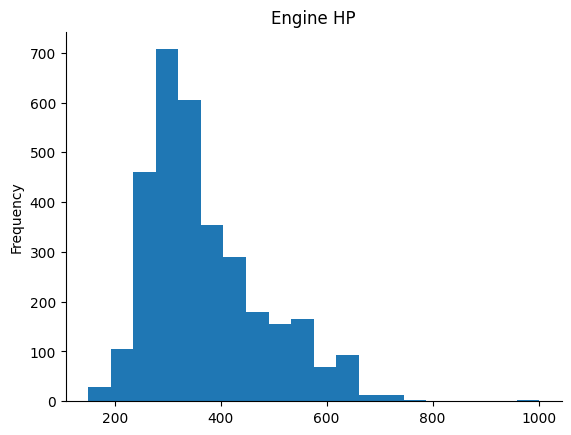

In [17]:
filtered_data['Engine HP'].plot(kind='hist', bins=20, title='Engine HP')
plt.gca().spines[['top', 'right',]].set_visible(False)
print(psutil.cpu_percent())

In [18]:
# Hitung frekuensi setiap 'Make' dari data yang difilter
make_counts = filtered_data['Make'].value_counts().reset_index()
make_counts.columns = ['Make', 'count']
print(psutil.cpu_percent())

87.5


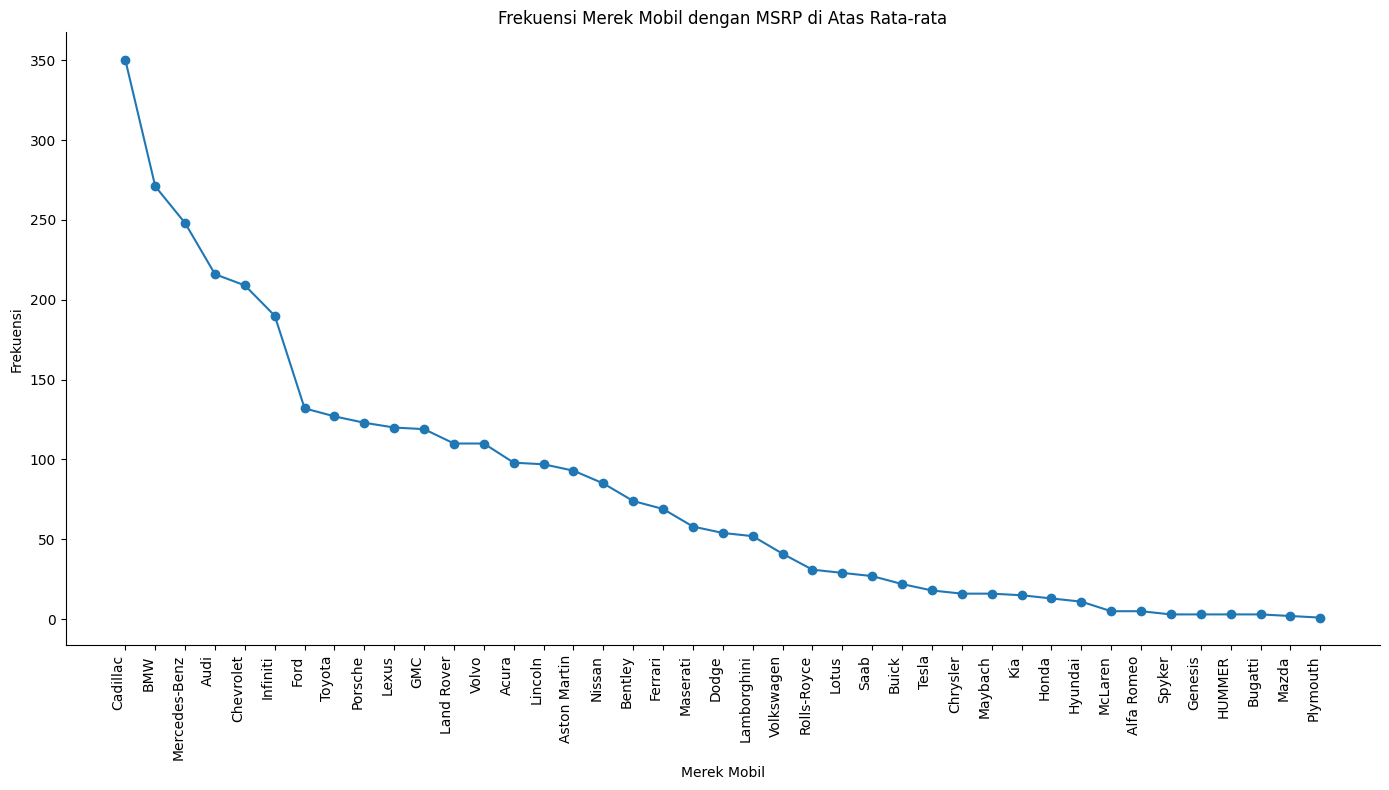

In [19]:
# Buat grafik frekuensi dari setiap 'Make' yang di atas harga rata-rata dalam bentuk line plot
plt.figure(figsize=(14, 8))
plt.plot(make_counts['Make'], make_counts['count'], marker='o', linestyle='-')
plt.title('Frekuensi Merek Mobil dengan MSRP di Atas Rata-rata')
plt.xlabel('Merek Mobil')
plt.ylabel('Frekuensi')
plt.xticks(rotation=90, ha='right')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.tight_layout()
plt.show()
print(psutil.cpu_percent())

In [20]:
res2 = spark.sql(f"SELECT * FROM car WHERE MSRP <= {average_msrp}")
print(psutil.cpu_percent())

71.8
100.0


In [21]:
filtered_data2 = res2.toPandas()
display(filtered_data2)
print(psutil.cpu_percent())

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
1,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
2,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2,Luxury,Compact,Convertible,28,18,3916,34500
3,BMW,1 Series,2012,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2,"Luxury,Performance",Compact,Coupe,28,18,3916,31200
4,BMW,1 Series,2012,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2,"Luxury,High-Performance",Compact,Coupe,28,20,3916,39300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8640,BMW,Z3,2001,premium unleaded (required),225.0,6.0,MANUAL,rear wheel drive,2,"Hatchback,Luxury,Performance",Compact,2dr Hatchback,26,19,3916,37700
8641,BMW,Z3,2002,premium unleaded (required),225.0,6.0,MANUAL,rear wheel drive,2,"Luxury,Performance",Compact,Convertible,26,19,3916,37900
8642,BMW,Z3,2002,premium unleaded (required),184.0,6.0,MANUAL,rear wheel drive,2,"Luxury,Performance",Compact,Convertible,25,18,3916,31300
8643,BMW,Z3,2002,premium unleaded (required),225.0,6.0,MANUAL,rear wheel drive,2,"Hatchback,Luxury,Performance",Compact,2dr Hatchback,26,19,3916,37700


100.0


In [22]:
# Hitung frekuensi setiap 'Make' dari data yang difilter
make_counts2 = filtered_data2['Make'].value_counts().reset_index()
make_counts.columns = ['Make', 'count']
print(psutil.cpu_percent())

100.0


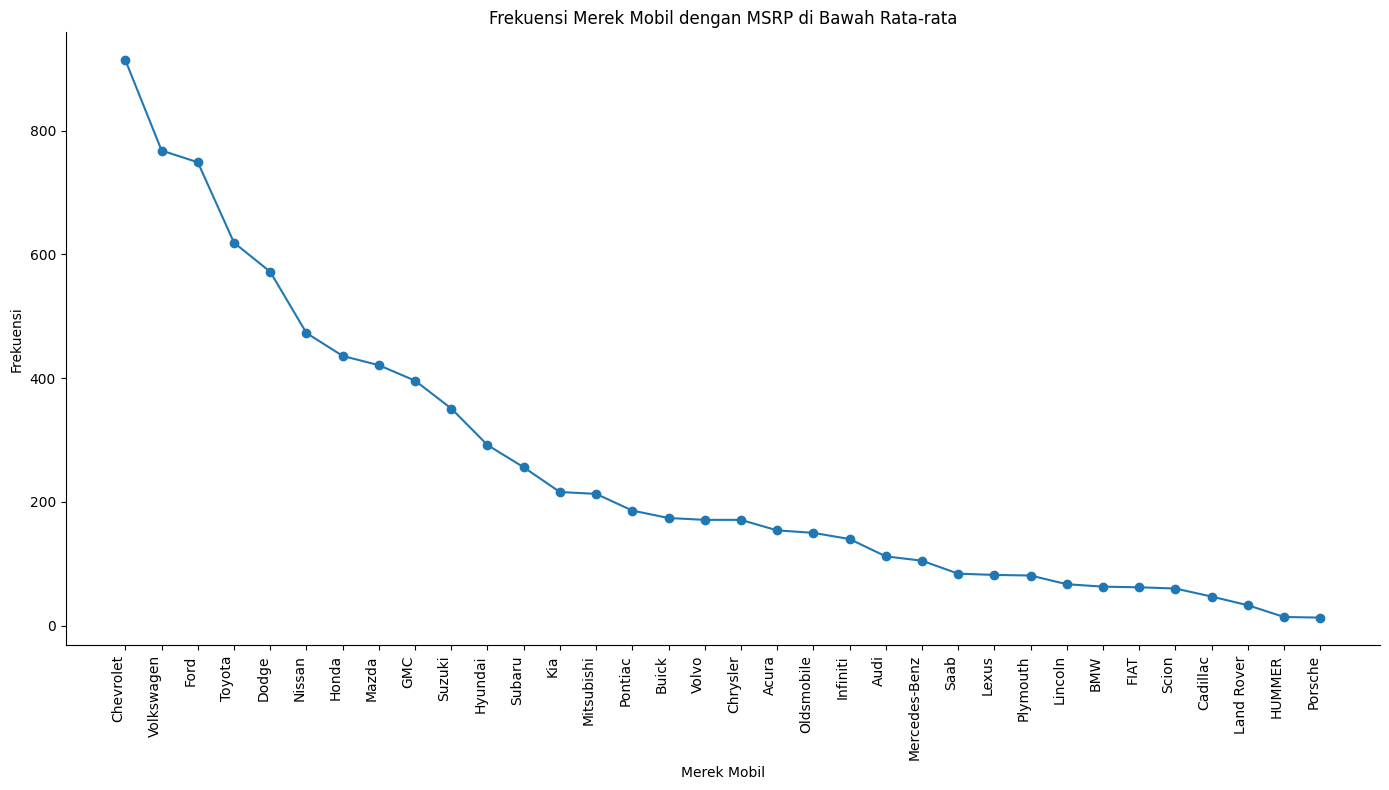

100.0


In [23]:
# Buat grafik frekuensi dari setiap 'Make' yang di atas harga rata-rata dalam bentuk line plot
plt.figure(figsize=(14, 8))
plt.plot(make_counts2['Make'], make_counts2['count'], marker='o', linestyle='-')
plt.title('Frekuensi Merek Mobil dengan MSRP di Bawah Rata-rata')
plt.xlabel('Merek Mobil')
plt.ylabel('Frekuensi')
plt.xticks(rotation=90, ha='right')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.tight_layout()
plt.show()
print(psutil.cpu_percent())

In [24]:
result = spark.sql("SELECT year, COUNT(*) as count FROM car GROUP BY year ORDER BY year")
result.show()


+----+-----+
|year|count|
+----+-----+
|1990|  123|
|1991|  152|
|1992|  177|
|1993|  209|
|1994|  163|
|1995|  135|
|1996|  131|
|1997|  175|
|1998|  154|
|1999|  120|
|2000|  118|
|2001|  168|
|2002|  205|
|2003|  238|
|2004|  235|
|2005|  213|
|2006|  205|
|2007|  345|
|2008|  349|
|2009|  379|
+----+-----+
only showing top 20 rows



In [25]:
res4 = spark.sql("SELECT Driven_Wheels, COUNT(*) as count FROM car GROUP BY Driven_Wheels")
res4.show()

+-----------------+-----+
|    Driven_Wheels|count|
+-----------------+-----+
| four wheel drive| 1403|
| rear wheel drive| 3371|
|  all wheel drive| 2353|
|front wheel drive| 4787|
+-----------------+-----+



In [26]:
selesai_ukur = time.time()

In [27]:
total_waktu = selesai_ukur - mulai_ukur
print("Waktu yang dibutuhkan untuk melakukan komputasi secara paralel: %f detik" % total_waktu )

Waktu yang dibutuhkan untuk melakukan komputasi secara paralel: 41.159474 detik
